<a href="https://colab.research.google.com/github/anny-dias/LandingPage-TOM/blob/main/gs_dynamicprogramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GS Dynamic Programming**

Anny Dias RM98295

Henrique Lima RM551528

Augusto Fisco RM98245

### **Case**

A energia renovável desempenha um papel fundamental na luta contra as mudanças climáticas, pois oferece uma alternativa limpa e sustentável aos combustíveis fósseis, que são responsáveis pela maior parte das emissões de gases de efeito estufa. Fontes como a solar, eólica, hídrica e biomassa não emitem poluentes durante a geração de eletricidade, contribuindo para a redução da pegada de carbono global. Além disso, essas fontes são praticamente inesgotáveis, ao contrário dos combustíveis fósseis, que são finitos e se esgotarão ao longo do tempo.

Além dos benefícios ambientais, a transição para a energia renovável também traz vantagens econômicas e sociais. Investir em tecnologias limpas cria novas oportunidades de emprego, desde a instalação de painéis solares até a construção de parques eólicos, e promove a independência energética, reduzindo a dependência de recursos importados. Isso fortalece a segurança energética e pode gerar uma economia mais resiliente e sustentável a longo prazo.


### **Questão 1 - Grafos**

A primeira fase da questão 1 será localizar e importar para o python dados relevantes para a comparação de países. Vocês deverão utilizar dados descrevendo algumas variáveis de interesse (podem ser essas que eu estou mostrando, podem ser outras)

* https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
* https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita
* https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions
* https://en.wikipedia.org/wiki/Nuclear_power_by_country
* https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production
* https://en.wikipedia.org/wiki/Wind_power_by_country

Os dados devem estar disponíveis no python utilizando-se:

* Dicionários codificados na mão OU
* Arquivos CSV, e funções auxiliares para a carga desses dados, que os tranformem em dicionários
  * Isso não foi apresentado em sala, mas é bem fácil. Venha falar comigo nos horários indicados na primeira folha, se tiver alguma dificuldade.
* Exemplo de represntação:
{“pais”:”Brasil”, “população”: 200000000, “pib”: xxx, “porcentagem de energia eólica”: yyy, …}

Vocês devem utilizar
* Pelo menos 5 tipos de dados diferentes (exemplo: população, PIB – em inglês GDP, produção total de energia, produção de energia nuclear, produção de energia eólica)
* Dados de pelo menos 20 países diferentes
* Não há problema se algum dado não existir para algum país. Dados reais são assim mesmo!

Baseados nos dados, criem
* Uma árvore binária, utilizando um dos dados específicos do país para fazer a comparação entre países e decidir qual país está em qual posição da árvore
* Funções de inserção e busca em árvores, utilizando diferentes critérios (podendo escolher, por exemplo, se a árvore vai ser baseada no PIB, na população ou no nome do país)

Pontuação:
* Os dados, representados de uma forma fácil de entender e sem erros, valem 10 pontos
* A árvore binária específica, vale 20 pontos
* As funções de busca e inserção valem 20 pontos, considerando se estão bem escritas – determine quais funções escrever e quais argumentos elas vão receber para atender aos critérios, te aviso que isso fará parte da avaliação!


In [24]:
import pandas as pd

# Carregar o arquivo CSV para inspecionar os dados
caminho_arquivo = 'ConsumoMundialDeEnergia.csv'
dados = pd.read_csv(caminho_arquivo)

# Mostrar as primeiras linhas do arquivo para identificar as colunas e os dados
dados.head(), dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


(         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
 0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
 1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
 2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
 3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
 4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   
 
    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
 0                      NaN                      NaN                  NaN   
 1                      NaN                      NaN                  NaN   
 2                      NaN                      NaN                  NaN   
 3                      NaN                      NaN                  NaN   
 4                      NaN                      NaN                  NaN   
 
    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_en

In [25]:
class No:
    def __init__(self, pais, populacao):
        self.pais = pais
        self.populacao = populacao
        self.esquerda = None
        self.direita = None

class ArvoreBinaria:
    def __init__(self):
        self.raiz = None

    # Inserir um novo nó na árvore binária
    def inserir(self, pais, populacao):
        novo_no = No(pais, populacao)
        if self.raiz is None:
            self.raiz = novo_no
        else:
            self._inserir_recursivo(self.raiz, novo_no)

    # Inserção recursiva na posição correta
    def _inserir_recursivo(self, atual, novo_no):
        if novo_no.populacao < atual.populacao:
            if atual.esquerda is None:
                atual.esquerda = novo_no
            else:
                self._inserir_recursivo(atual.esquerda, novo_no)
        else:
            if atual.direita is None:
                atual.direita = novo_no
            else:
                self._inserir_recursivo(atual.direita, novo_no)

    # Travessia em ordem (in-order) para obter os nós ordenados
    def travessia_em_ordem(self, no, resultado=None):
        if resultado is None:
            resultado = []
        if no:
            self.travessia_em_ordem(no.esquerda, resultado)
            resultado.append((no.pais, no.populacao))
            self.travessia_em_ordem(no.direita, resultado)
        return resultado


# Filtrar os dados para remover países sem informações de população e pegar o último ano disponível
dados_filtrados = dados[['country', 'year', 'population']].dropna()
ultimo_ano = dados_filtrados['year'].max()
dados_filtrados = dados_filtrados[dados_filtrados['year'] == ultimo_ano]

# Criar a árvore binária e inserir os países com suas populações
arvore_binaria = ArvoreBinaria()
for _, linha in dados_filtrados.iterrows():
    arvore_binaria.inserir(linha['country'], linha['population'])

# Obter o resultado da travessia em ordem (in-order)
resultado_em_ordem = arvore_binaria.travessia_em_ordem(arvore_binaria.raiz)
print(resultado_em_ordem[:10])  # Exibir os 10 primeiros países ordenados por população



[('Iceland', 372903.0), ('Brunei', 449002.0), ('Malta', 533293.0), ('Montenegro', 627082.0), ('Luxembourg', 647601.0), ('Cyprus', 1251492.0), ('Estonia', 1326064.0), ('Bahrain', 1472237.0), ('Trinidad and Tobago', 1531043.0), ('Kosovo', 1659721.0)]


In [26]:
class No:
    def __init__(self, pais, valor):
        self.pais = pais
        self.valor = valor
        self.esquerda = None
        self.direita = None

class ArvoreBinaria:
    def __init__(self):
        self.raiz = None

    # Inserir um nó na árvore
    def inserir(self, pais, valor):
        novo_no = No(pais, valor)
        if self.raiz is None:
            self.raiz = novo_no
        else:
            self._inserir_recursivo(self.raiz, novo_no)

    # Inserção recursiva
    def _inserir_recursivo(self, atual, novo_no):
        if novo_no.valor < atual.valor:
            if atual.esquerda is None:
                atual.esquerda = novo_no
            else:
                self._inserir_recursivo(atual.esquerda, novo_no)
        else:
            if atual.direita is None:
                atual.direita = novo_no
            else:
                self._inserir_recursivo(atual.direita, novo_no)

    # Buscar um valor na árvore
    def buscar(self, valor):
        return self._buscar_recursivo(self.raiz, valor)

    # Busca recursiva
    def _buscar_recursivo(self, atual, valor):
        if atual is None:
            return None
        if atual.valor == valor:
            return atual.pais
        elif valor < atual.valor:
            return self._buscar_recursivo(atual.esquerda, valor)
        else:
            return self._buscar_recursivo(atual.direita, valor)

# Criar árvore com base em um critério
def criar_arvore_com_criterio(dados, coluna_criterio):
    arvore = ArvoreBinaria()
    for _, linha in dados.iterrows():
        arvore.inserir(linha['country'], linha[coluna_criterio])
    return arvore

# Filtrar dados para criar árvores
dados_filtrados = dados[['country', 'population', 'gdp']].dropna()

# Criar árvore com critério de população
arvore_populacao = criar_arvore_com_criterio(dados_filtrados, 'population')
# Criar árvore com critério de PIB (GDP)
arvore_pib = criar_arvore_com_criterio(dados_filtrados, 'gdp')

# Exemplos de busca
busca_populacao = 1251492  # População para buscar
resultado_populacao = arvore_populacao.buscar(busca_populacao)

busca_pib = 647601  # PIB para buscar
resultado_pib = arvore_pib.buscar(busca_pib)

# Exibir resultados das buscas
print(f"País com população {busca_populacao}: {resultado_populacao}")
print(f"País com PIB {busca_pib}: {resultado_pib}")


País com população 1251492: None
País com PIB 647601: None


In [27]:
import pandas as pd

# Estrutura da árvore binária
class NoArvore:
    def __init__(self, dados):
        self.dados = dados  # Dicionário com informações do país
        self.esquerda = None  # Subárvore à esquerda
        self.direita = None  # Subárvore à direita


class ArvoreBinaria:
    def __init__(self):
        self.raiz = None

    # Insere um nó na árvore com base no PIB
    def inserir(self, dados):
        if self.raiz is None:
            self.raiz = NoArvore(dados)
        else:
            self._inserir(self.raiz, dados)

    def _inserir(self, no, dados):
        if dados["gdp"] < no.dados["gdp"]:
            if no.esquerda is None:
                no.esquerda = NoArvore(dados)
            else:
                self._inserir(no.esquerda, dados)
        else:
            if no.direita is None:
                no.direita = NoArvore(dados)
            else:
                self._inserir(no.direita, dados)

    # Busca um país na árvore
    def buscar(self, pais):
        return self._buscar(self.raiz, pais)

    def _buscar(self, no, pais):
        if no is None:
            return None
        if no.dados["country"] == pais:
            return no.dados
        elif pais < no.dados["country"]:
            return self._buscar(no.esquerda, pais)
        else:
            return self._buscar(no.direita, pais)

    # Realiza percurso em ordem (in-order)
    def percurso_em_ordem(self, no=None, resultado=None):
        if resultado is None:
            resultado = []
        if no is None:
            no = self.raiz
        if no.esquerda:
            self.percurso_em_ordem(no.esquerda, resultado)
        resultado.append(no.dados)
        if no.direita:
            self.percurso_em_ordem(no.direita, resultado)
        return resultado


# Função principal para carregar dados e criar a árvore
def main():
    # Carregar o arquivo CSV
    caminho_arquivo = "ConsumoMundialDeEnergia.csv"  # Atualize para o caminho correto
    dados = pd.read_csv(caminho_arquivo)

    # Selecionar as colunas importantes
    colunas_selecionadas = ['country', 'year', 'population', 'gdp', 'solar_share_elec', 'wind_share_elec']
    dados_filtrados = dados[colunas_selecionadas]

    # Filtrar para o ano mais recente
    dados_filtrados = dados_filtrados.dropna()
    ano_mais_recente = dados_filtrados['year'].max()
    dados_filtrados = dados_filtrados[dados_filtrados['year'] == ano_mais_recente]

    # Selecionar dados de 20 países
    dados_filtrados = dados_filtrados.head(20)
    dados_filtrados.reset_index(drop=True, inplace=True)

    # Criar a árvore binária
    arvore = ArvoreBinaria()
    for _, linha in dados_filtrados.iterrows():
        arvore.inserir(linha.to_dict())

    # Exibir países em ordem crescente de PIB
    print("Países na árvore em ordem crescente de PIB:")
    for pais in arvore.percurso_em_ordem():
        print(pais)

    # Buscar informações de um país
    pais_buscar = "Brazil"  # Altere para o país desejado
    resultado = arvore.buscar(pais_buscar)
    if resultado:
        print(f"\nInformações do país {pais_buscar}:")
        print(resultado)
    else:
        print(f"\nPaís {pais_buscar} não encontrado na árvore.")


if __name__ == "__main__":
    main()


Países na árvore em ordem crescente de PIB:
{'country': 'Barbados', 'year': 2018, 'population': 279702.0, 'gdp': 3516161024.0, 'solar_share_elec': 3.0, 'wind_share_elec': 0.0}
{'country': 'Benin', 'year': 2018, 'population': 11940688.0, 'gdp': 26682034176.0, 'solar_share_elec': 0.0, 'wind_share_elec': 0.0}
{'country': 'Armenia', 'year': 2018, 'population': 2836563.0, 'gdp': 33296515072.0, 'solar_share_elec': 0.271, 'wind_share_elec': 0.0}
{'country': 'Albania', 'year': 2018, 'population': 2877019.0, 'gdp': 34009112576.0, 'solar_share_elec': 0.0, 'wind_share_elec': 0.0}
{'country': 'Botswana', 'year': 2018, 'population': 2451411.0, 'gdp': 35844341760.0, 'solar_share_elec': 0.337, 'wind_share_elec': 0.0}
{'country': 'Bosnia and Herzegovina', 'year': 2018, 'population': 3400132.0, 'gdp': 41286324224.0, 'solar_share_elec': 0.11, 'wind_share_elec': 0.548}
{'country': 'Bahrain', 'year': 2018, 'population': 1487346.0, 'gdp': 62559305728.0, 'solar_share_elec': 0.036, 'wind_share_elec': 0.0}
{'

### **Questão 2 - Grafos**

Localize um mapa de um sistema de transporte ferroviário ou metroviário de uma cidade. Selecione um conjunto de 10 estações, próximas uma da outra. Forneça uma representação do grafo correspondente a esse mapa como uma matriz de adjacências (a representação vista em sala).



*   Envie o mapa e a representação em matriz. (10 pontos)
*   Simule o algoritmo de cálculo de distâncias visto em sala, a partir de um dos vértices, e mostre uma lista correspondente, contendo todos os vértices visitados, e a ordem de visitação (20 pontos)
* Simular significa mostrar os valores das variáveis a cada passo. Isso implica mostrar as distâncias conforme elas vão sendo computadas, e as variáveis auxiliares definidas pelo algoritmo








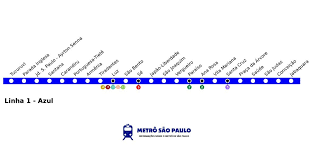



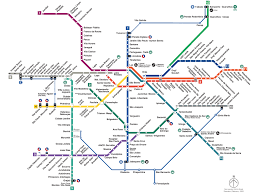

In [ ]:
# Representação da matriz de adjacências do sistema metroviário de São Paulo - Linha 1 Azul
# Estações: Jabaquara (J), Conceição (C), São Judas (SJ), Saúde (Sa),
# Praça da Árvore (PA), Santa Cruz (SC), Vila Mariana (VM),
# Ana Rosa (AR), Paraíso (P), Sé (Sé)

# Matriz
matriz_adjacencia = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Jabaquara
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Conceição
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # São Judas
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # Saúde
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # Praça da Árvore
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # Santa Cruz
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # Vila Mariana
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # Ana Rosa
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Paraíso
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Sé
]

for linha in matriz_adjacencia:
    print(linha)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [ ]:
import math

# Estações
estacoes = ["Jabaquara", "Conceição", "São Judas", "Saúde", "Praça da Árvore",
            "Santa Cruz", "Vila Mariana", "Ana Rosa", "Paraíso", "Sé"]

# Matriz (distâncias)
matriz_adjacencia = [
    [0, 1, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf],  # Jabaquara
    [1, 0, 1, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf],  # Conceição
    [math.inf, 1, 0, 1, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf],  # São Judas
    [math.inf, math.inf, 1, 0, 1, math.inf, math.inf, math.inf, math.inf, math.inf],  # Saúde
    [math.inf, math.inf, math.inf, 1, 0, 1, math.inf, math.inf, math.inf, math.inf],  # Praça da Árvore
    [math.inf, math.inf, math.inf, math.inf, 1, 0, 1, math.inf, math.inf, math.inf],  # Santa Cruz
    [math.inf, math.inf, math.inf, math.inf, math.inf, 1, 0, 1, math.inf, math.inf],  # Vila Mariana
    [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, 1, 0, 1, math.inf],  # Ana Rosa
    [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, 1, 0, 1],  # Paraíso
    [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, math.inf, 1, 0],  # Sé
]

def dijkstra(matriz, origem):
    distancias = {estacao: math.inf for estacao in estacoes}  # Distâncias iniciais
    distancias[origem] = 0  # Distância da origem para si mesma é 0
    visitados = []  # Estações visitadas
    nao_visitados = estacoes.copy()  # Estações não visitadas
    caminho = {estacao: None for estacao in estacoes}

    while nao_visitados:
        # Escolher a estação com a menor distância
        estacao_atual = min(nao_visitados, key=lambda estacao: distancias[estacao])

        # Adicionar à lista de visitados
        visitados.append(estacao_atual)
        nao_visitados.remove(estacao_atual)

        # Atualizar distâncias das estações vizinhas
        for i, estacao in enumerate(estacoes):
            if matriz[estacoes.index(estacao_atual)][i] != math.inf and estacao in nao_visitados:
                distancia = matriz[estacoes.index(estacao_atual)][i]
                nova_distancia = distancias[estacao_atual] + distancia
                if nova_distancia < distancias[estacao]:
                    distancias[estacao] = nova_distancia
                    caminho[estacao] = estacao_atual

        print(f"Estação atual: {estacao_atual}")
        print(f"Distâncias: {distancias}")
        print(f"Caminho: {caminho}")
        print(f"Visitados: {visitados}")
        print(f"Não visitados: {nao_visitados}")
        print("-" * 50)

    return distancias, caminho

# Simulação de Dijkstra a partir da estação "Jabaquara"
origem = "Jabaquara"
distancias, caminho = dijkstra(matriz_adjacencia, origem)

# Exibir os resultados
print("Distâncias finais a partir de Jabaquara:")
for estacao, distancia in distancias.items():
    print(f"{estacao}: {distancia}")


Estação atual: Jabaquara
Distâncias: {'Jabaquara': 0, 'Conceição': 1, 'São Judas': inf, 'Saúde': inf, 'Praça da Árvore': inf, 'Santa Cruz': inf, 'Vila Mariana': inf, 'Ana Rosa': inf, 'Paraíso': inf, 'Sé': inf}
Caminho: {'Jabaquara': None, 'Conceição': 'Jabaquara', 'São Judas': None, 'Saúde': None, 'Praça da Árvore': None, 'Santa Cruz': None, 'Vila Mariana': None, 'Ana Rosa': None, 'Paraíso': None, 'Sé': None}
Visitados: ['Jabaquara']
Não visitados: ['Conceição', 'São Judas', 'Saúde', 'Praça da Árvore', 'Santa Cruz', 'Vila Mariana', 'Ana Rosa', 'Paraíso', 'Sé']
--------------------------------------------------
Estação atual: Conceição
Distâncias: {'Jabaquara': 0, 'Conceição': 1, 'São Judas': 2, 'Saúde': inf, 'Praça da Árvore': inf, 'Santa Cruz': inf, 'Vila Mariana': inf, 'Ana Rosa': inf, 'Paraíso': inf, 'Sé': inf}
Caminho: {'Jabaquara': None, 'Conceição': 'Jabaquara', 'São Judas': 'Conceição', 'Saúde': None, 'Praça da Árvore': None, 'Santa Cruz': None, 'Vila Mariana': None, 'Ana Rosa':

### **Questão 3 - O grande**

Exiba duas funções para resolver um mesmo problema, cada uma com uma complexidade (O grande) diferente. Quais essas complexidades? Sinalize qual das duas, se implementada, corresponderá a um consumo energético maior, ao ser executada com listas (ou qual for a entrada adequada) de tamanho 1000. Qual será a proporção entre esses dois consumos?

**Função 1**

In [ ]:
# Função com complexidade O(n^2)
def encontrar_maior_quadratico(numeros):
    for i in range(len(numeros)):
        eh_maior = True
        for j in range(len(numeros)):
            if numeros[j] > numeros[i]:
                eh_maior = False
                break
        if eh_maior:
            return numeros[i]

**Função 2**

In [ ]:
# Função com complexidade O(n)
def encontrar_maior_linear(numeros):
    maior_numero = numeros[0]
    for numero in numeros:
        if numero > maior_numero:
            maior_numero = numero
    return maior_numero

**Consumo maior**

In [ ]:
def contar_operacoes_quadratico(numeros):
    operacoes = 0
    for i in range(len(numeros)):
        for j in range(len(numeros)):
            operacoes += 1  # Conta cada comparação no loop
    return operacoes

def contar_operacoes_linear(numeros):
    operacoes = 0
    for numero in numeros:
        operacoes += 1  # Conta cada comparação no loop
    return operacoes

# Lista de exemplo com 1000 elementos
numeros = list(range(1000))

# Contar operações para cada função
operacoes_quadratico = contar_operacoes_quadratico(numeros)
operacoes_linear = contar_operacoes_linear(numeros)

print("Operações na função quadrática (O(n^2)):", operacoes_quadratico)
print("Operações na função linear (O(n)):", operacoes_linear)

if operacoes_quadratico > operacoes_linear:
    print("A função quadrática consome mais energia.")
else:
    print("A função linear consome mais energia.")


Operações na função quadrática (O(n^2)): 1000000
Operações na função linear (O(n)): 1000
A função quadrática consome mais energia.


**Proporção entre os consumos**

In [ ]:
def contar_operacoes_quadratico(numeros):
    operacoes = 0
    for i in range(len(numeros)):
        for j in range(len(numeros)):
            operacoes += 1  # Conta cada comparação no loop
    return operacoes

def contar_operacoes_linear(numeros):
    operacoes = 0
    for numero in numeros:
        operacoes += 1  # Conta cada comparação no loop
    return operacoes

# Lista de exemplo com 1000 elementos
numeros = list(range(1000))

# Contar operações para cada função
operacoes_quadratico = contar_operacoes_quadratico(numeros)
operacoes_linear = contar_operacoes_linear(numeros)

# Calcular a proporção
proporcao = operacoes_quadratico / operacoes_linear

print("Operações na função quadrática (O(n^2)):", operacoes_quadratico)
print("Operações na função linear (O(n)):", operacoes_linear)
print("Proporção entre os consumos (quadrático / linear):", proporcao)


Operações na função quadrática (O(n^2)): 1000000
Operações na função linear (O(n)): 1000
Proporção entre os consumos (quadrático / linear): 1000.0
